<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    83.633334  33.734233  84.260308  ...  222.714243  214.089837   8.624406
      1.0    60.323686  68.860265  73.123589  ...  206.109950  212.197484  -6.087534
      2.0    32.141175  45.491152  86.561081  ...  174.800673  173.996571   0.804102
      3.0    72.880381  21.200705  83.227093  ...  176.702749  189.657437 -12.954688
      4.0    20.759071  81.147665  88.173902  ...  174.942302  198.248237 -23.305935
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  96.373498  34.297171  42.241538  ...  178.167509  183.053206  -4.885697
      246.0  98.493450  47.222002  46.196062  ...  204.593357  201.681190   2.912167
      247.0  36.332791  38.747684  82.707809  ...  182.216388  167.009336  15.207052
      248.0  38.725677  45.879204  35.021734  ...  133.051454  127.003114   6.048340
      249.0  84.207032  49.957643  97.038975  ...  243.193977  242.069647   1.124331

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    83.633334  33.734233  84.260308  ...  222.714243  214.089837   8.624406
      1.0    60.323686  68.860265  73.123589  ...  206.109950  212.197484  -6.087534
      2.0    32.141175  45.491152  86.561081  ...  174.800673  173.996571   0.804102
      3.0    72.880381  21.200705  83.227093  ...  176.702749  189.657437 -12.954688
      4.0    20.759071  81.147665  88.173902  ...  174.942302  198.248237 -23.305935
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  96.373498  34.297171  42.241538  ...  178.167509  183.053206  -4.885697
      246.0  98.493450  47.222002  46.196062  ...  204.593357  201.681190   2.912167
      247.0  36.332791  38.747684  82.707809  ...  182.216388  167.009336  15.207052
      248.0  38.725677  45.879204  35.021734  ...  133.051454  127.003114   6.048340
      249.0  84.207032  49.957643  97.038975  ...  243.193977  242.069647   1.124331

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    83.633334  33.734233  84.260308  ...  222.714243  214.089837   8.624406
      1.0    60.323686  68.860265  73.123589  ...  206.109950  212.197484  -6.087534
      2.0    32.141175  45.491152  86.561081  ...  174.800673  173.996571   0.804102
      3.0    72.880381  21.200705  83.227093  ...  176.702749  189.657437 -12.954688
      4.0    20.759071  81.147665  88.173902  ...  174.942302  198.248237 -23.305935
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  96.373498  34.297171  42.241538  ...  178.167509  183.053206  -4.885697
      246.0  98.493450  47.222002  46.196062  ...  204.593357  201.681190   2.912167
      247.0  36.332791  38.747684  82.707809  ...  182.216388  167.009336  15.207052
      248.0  38.725677  45.879204  35.021734  ...  133.051454  127.003114   6.048340
      249.0  84.207032  49.957643  97.038975  ...  243.193977  242.069647   1.124331

[250000 rows x 7 columns]

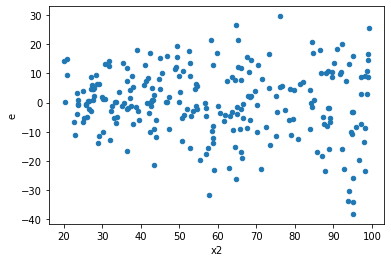

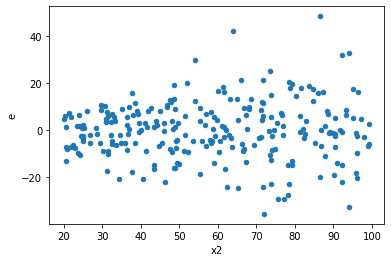

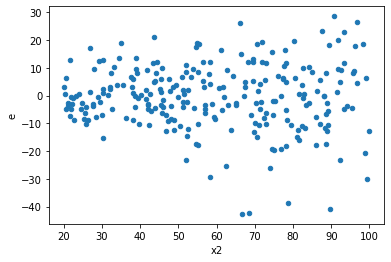

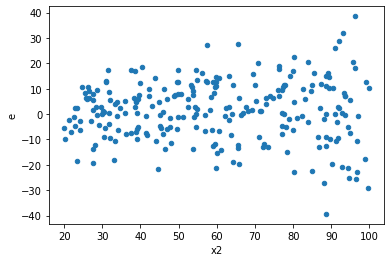

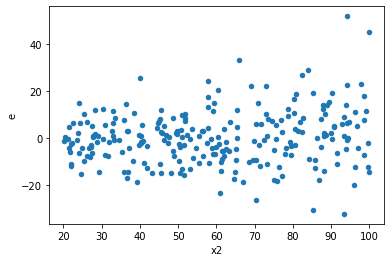

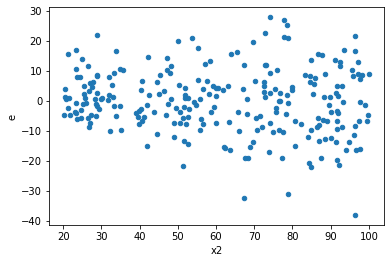

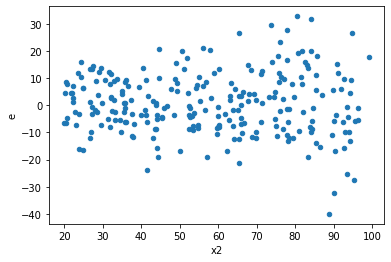

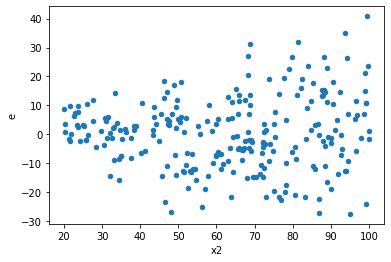

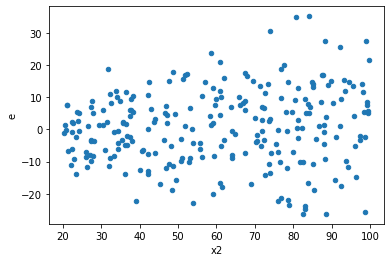

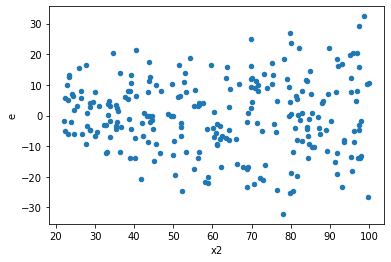

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,8030.353744075226,16452.096600201094,82.78715200077552,169.6092433010422,2.0487387137010504,0.0004898882227826196,0.9997550558886087,0.0002449441113913098,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,7746.638264583662,21013.059512183343,79.86225015034704,216.62947950704478,2.7125391420755434,1.545469835662061e-06,0.9999992272650822,7.727349178310305e-07,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6472.699299520188,20899.02111210323,66.72885875794009,215.45382589797146,3.2287953054844434,2.0901989694621648e-08,0.9999999895490052,1.0450994847310824e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,5794.89500111137,22462.926497050692,59.741185578467736,231.57656182526486,3.876330199726251,1.3246559404933578e-10,0.9999999999337672,6.623279702466789e-11,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,6074.016543676035,19833.779280630395,62.61872725439212,204.4719513467051,3.265348248232933,1.5546096410190557e-08,0.9999999922269518,7.773048205095279e-09,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6804.777026063332,19809.001038739087,70.15234047487972,204.2165055540112,2.911043368925623,2.87949372346219e-07,0.9999998560253138,1.439746861731095e-07,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6985.2221016687,17370.069023863067,72.01259898627525,179.0728765346708,2.4866881497888995,1.0794036516825756e-05,0.9999946029817416,5.397018258412878e-06,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,8365.496286847057,19574.04145231578,86.24222976130987,201.79424177645134,2.339854179732498,3.869210302842596e-05,0.9999806539484858,1.934605151421298e-05,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,6874.224653038315,15250.688472968075,70.86829539214759,157.22359250482552,2.2185321607473902,0.00011152866268915318,0.9999442356686554,5.576433134457659e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8030.353744075226,16452.096600201094,82.78715200077552,169.6092433010422,2.0487387137010504,0.0004898882227826196,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,7746.638264583662,21013.059512183343,79.86225015034704,216.62947950704478,2.7125391420755434,1.545469835662061e-06,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6472.699299520188,20899.02111210323,66.72885875794009,215.45382589797146,3.2287953054844434,2.0901989694621648e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,5794.89500111137,22462.926497050692,59.741185578467736,231.57656182526486,3.876330199726251,1.3246559404933578e-10,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,6074.016543676035,19833.779280630395,62.61872725439212,204.4719513467051,3.265348248232933,1.5546096410190557e-08,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6804.777026063332,19809.001038739087,70.15234047487972,204.2165055540112,2.911043368925623,2.87949372346219e-07,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6985.2221016687,17370.069023863067,72.01259898627525,179.0728765346708,2.4866881497888995,1.0794036516825756e-05,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,8365.496286847057,19574.04145231578,86.24222976130987,201.79424177645134,2.339854179732498,3.869210302842596e-05,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,6874.224653038315,15250.688472968075,70.86829539214759,157.22359250482552,2.2185321607473902,0.00011152866268915318,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    997
Reject005=1 : Homoscedasticity        3
Name: Result_test, dtype: int64